# CHAPTER 10 | Introduction to Articial Neural Networks with Keras

## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int) # Is Iris Setosa ?

In [3]:
per_clf = Perceptron(max_iter=1000, tol=1e-3)
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred # Should be 1, aka true

array([0])

## Implementing MLPs with Keras

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


### Building an image classifier user the sequential API

In [7]:
#Loading the dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
# Creating the Model using the sequential API

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Training and Evaluating the Model

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 85us/sample - loss: 0.7136 - accuracy: 0.7657 - val_loss: 0.5016 - val_accuracy: 0.8340
Epoch 2/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.4889 - accuracy: 0.8310 - val_loss: 0.4416 - val_accuracy: 0.8458
Epoch 3/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.4434 - accuracy: 0.8443 - val_loss: 0.4916 - val_accuracy: 0.8242
Epoch 4/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4158 - accuracy: 0.8530 - val_loss: 0.4032 - val_accuracy: 0.8580
Epoch 5/30
55000/55000 [==============================] - 4s 68us/sample - loss: 0.3961 - accuracy: 0.8604 - val_loss: 0.3968 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3805 - accuracy: 0.8660 - val_loss: 0.4017 - val_accuracy: 0.8558
Epoch 7/30
55000/55000 [==============================] -

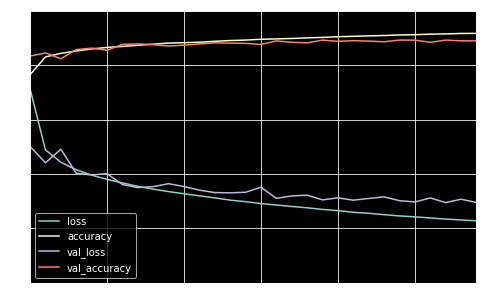

In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
model.evaluate(X_test, y_test)

[54.37737904930115, 0.8636]

### Using the Model to Make Predictions

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing()

In [25]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [27]:
# building the model

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer="sgd")

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.8888 - val_loss: 0.6008
Epoch 2/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6419 - val_loss: 0.4939
Epoch 3/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.6467 - val_loss: 0.4875
Epoch 4/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4738 - val_loss: 0.4371
Epoch 5/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4500 - val_loss: 0.4291
Epoch 6/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4632 - val_loss: 0.4229
Epoch 7/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4303 - val_loss: 0.4144
Epoch 8/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4262 - val_loss: 0.4072
Epoch 9/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4201 - val_l

In [29]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

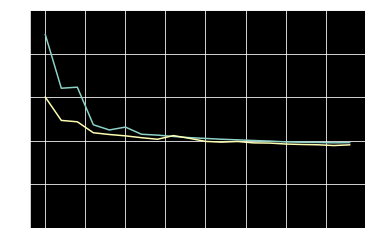

In [30]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Building Complex Models Using the Functional API

In [31]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])

output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

![](./images/chap10/figure10-13.png)

In [32]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

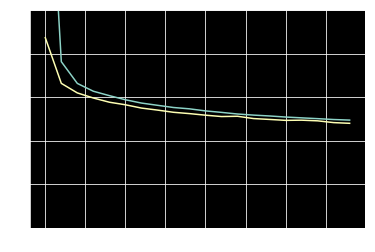

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

![](./images/chap10/figure10-14.png)

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 102us/sample - loss: 2.1523 - val_loss: 0.7950
Epoch 2/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.7322 - val_loss: 0.6730
Epoch 3/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.6627 - val_loss: 0.6306
Epoch 4/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.6306 - val_loss: 0.6042
Epoch 5/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.6071 - val_loss: 0.5822
Epoch 6/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5879 - val_loss: 0.5639
Epoch 7/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.5717 - val_loss: 0.5486
Epoch 8/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5585 - val_loss: 0.5357
Epoch 9/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5469 - val_

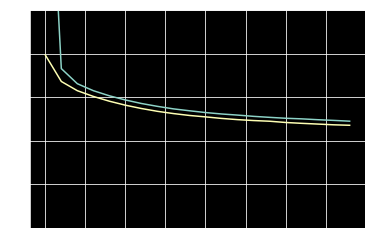

In [36]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

In [38]:
# Modol w/ multiple outputs

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [39]:
# 1 loss by output (or 1 for all (PLUS ULTRA!)) and we can apply loss_weight
# if we give more or less value to one of the losses
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
    )
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 146us/sample - loss: 1.6678 - output_loss: 1.6210 - aux_output_loss: 2.0828 - val_loss: 0.6338 - val_output_loss: 0.5635 - val_aux_output_loss: 1.2662
Epoch 2/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.6539 - output_loss: 0.5940 - aux_output_loss: 1.1932 - val_loss: 0.5489 - val_output_loss: 0.4875 - val_aux_output_loss: 1.1011
Epoch 3/20
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5427 - output_loss: 0.4854 - aux_output_loss: 1.0565 - val_loss: 0.5057 - val_output_loss: 0.4520 - val_aux_output_loss: 0.9881
Epoch 4/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.5094 - output_loss: 0.4606 - aux_output_loss: 0.9493 - val_loss: 0.4788 - val_output_loss: 0.4343 - val_aux_output_loss: 0.8790
Epoch 5/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4824 - output_loss: 

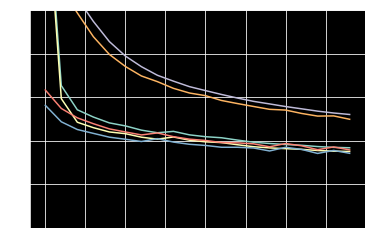

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

In [42]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
print(y_pred_main, y_pred_aux)

[[2.3592706]
 [4.264719 ]
 [1.9638222]] [[2.0367436]
 [3.68409  ]
 [1.6384975]]


### Building Dynamic Models Using the Subclassing API

In [43]:
# p.309